In [10]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [11]:
import os
import pyfolio as pf
import pandas as pd
from zipline.utils.run_algo import load_extensions

load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

In [12]:
from zipline.data import bundles

bundle = bundles.load('eu_stocks_algo')
bundle.asset_finder.retrieve_all(bundle.asset_finder.sids)

[Equity(0 [ABN]), Equity(1 [AEX]), Equity(2 [UNA])]

In [25]:
%%zipline --start 2018-1-1 --end 2018-12-31 --capital-base 100.0 -o stochastic.pkl --bundle eu_stocks_algo --trading-calendar XAMS

# imports ----
from zipline.api import order_target, record, symbol, set_commission, order_percent
import matplotlib.pyplot as plt
import talib as ta
from zipline.finance import commission

# parameters ----
SELECTED_STOCK = 'AEX'

 #initialize the strategy 
def initialize(context):
    context.asset = symbol(SELECTED_STOCK)
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))
    context.has_position = "Neutral"
    
def handle_data(context, data):
    
    price_history = data.history(context.asset, fields="price", bar_count=34, frequency="1d")
    highs_history = data.history(context.asset, fields="high", bar_count=34, frequency="1d")
    lows_history = data.history(context.asset, fields="low", bar_count=34, frequency="1d")
    
    slowk,slowd = ta.STOCH(highs_history.values, lows_history.values, price_history.values, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    
    
    for i in range(1,len(slowk)):
        if (slowk[i-1] <= slowd[i-1]) and (slowk[i] >= slowd[i]) and context.has_position != "Long":
            #point.append(1)
            order_target(context.asset, 0)
            order_percent(context.asset, 0.1)
            context.has_position = "Long"
        elif (slowk[i-1] >= slowd[i-1]) and (slowk[i] <= slowd[i]) and context.has_position != "Short":
            #point.append(-1)
            order_target(context.asset, 0)
            order_percent(context.asset, -0.1)
            context.has_position = "Short"
        else:
            order_target(context.asset, 0)
            context.has_position = "Neutral"
            
        record(slowk =  slowk[-1], slowd = slowd[-1], price=price_history[-1])
        
        

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,shorts_count,slowd,slowk,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-01-02 16:30:00+00:00,NaN,0.0,None,0.0,NaN,None,0.0,1000.0,0.0,0.0,...,0,32.922937,30.817243,None,1000.0,0.0,0.0,1,[],0.0
2018-01-03 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,35.489481,46.767766,None,1000.0,0.0,0.0,2,[],0.0
2018-01-04 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,50.815996,74.862980,None,1000.0,0.0,0.0,3,[],0.0
2018-01-05 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,71.415897,92.616945,None,1000.0,0.0,0.0,4,[],0.0
2018-01-08 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,88.219042,97.177201,None,1000.0,0.0,0.0,5,[],0.0
2018-01-09 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,96.196001,98.793858,None,1000.0,0.0,0.0,6,[],0.0
2018-01-10 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,95.684184,91.081492,None,1000.0,0.0,0.0,7,[],0.0
2018-01-11 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,88.508020,75.648709,None,1000.0,0.0,0.0,8,[],0.0
2018-01-12 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,76.485529,62.726385,None,1000.0,0.0,0.0,9,[],0.0
2018-01-15 16:30:00+00:00,0.0,0.0,None,0.0,0.0,None,0.0,1000.0,0.0,0.0,...,0,65.041738,56.750121,None,1000.0,0.0,0.0,10,[],0.0


In [14]:
stochastic_results = pd.read_pickle('stochastic.pkl')

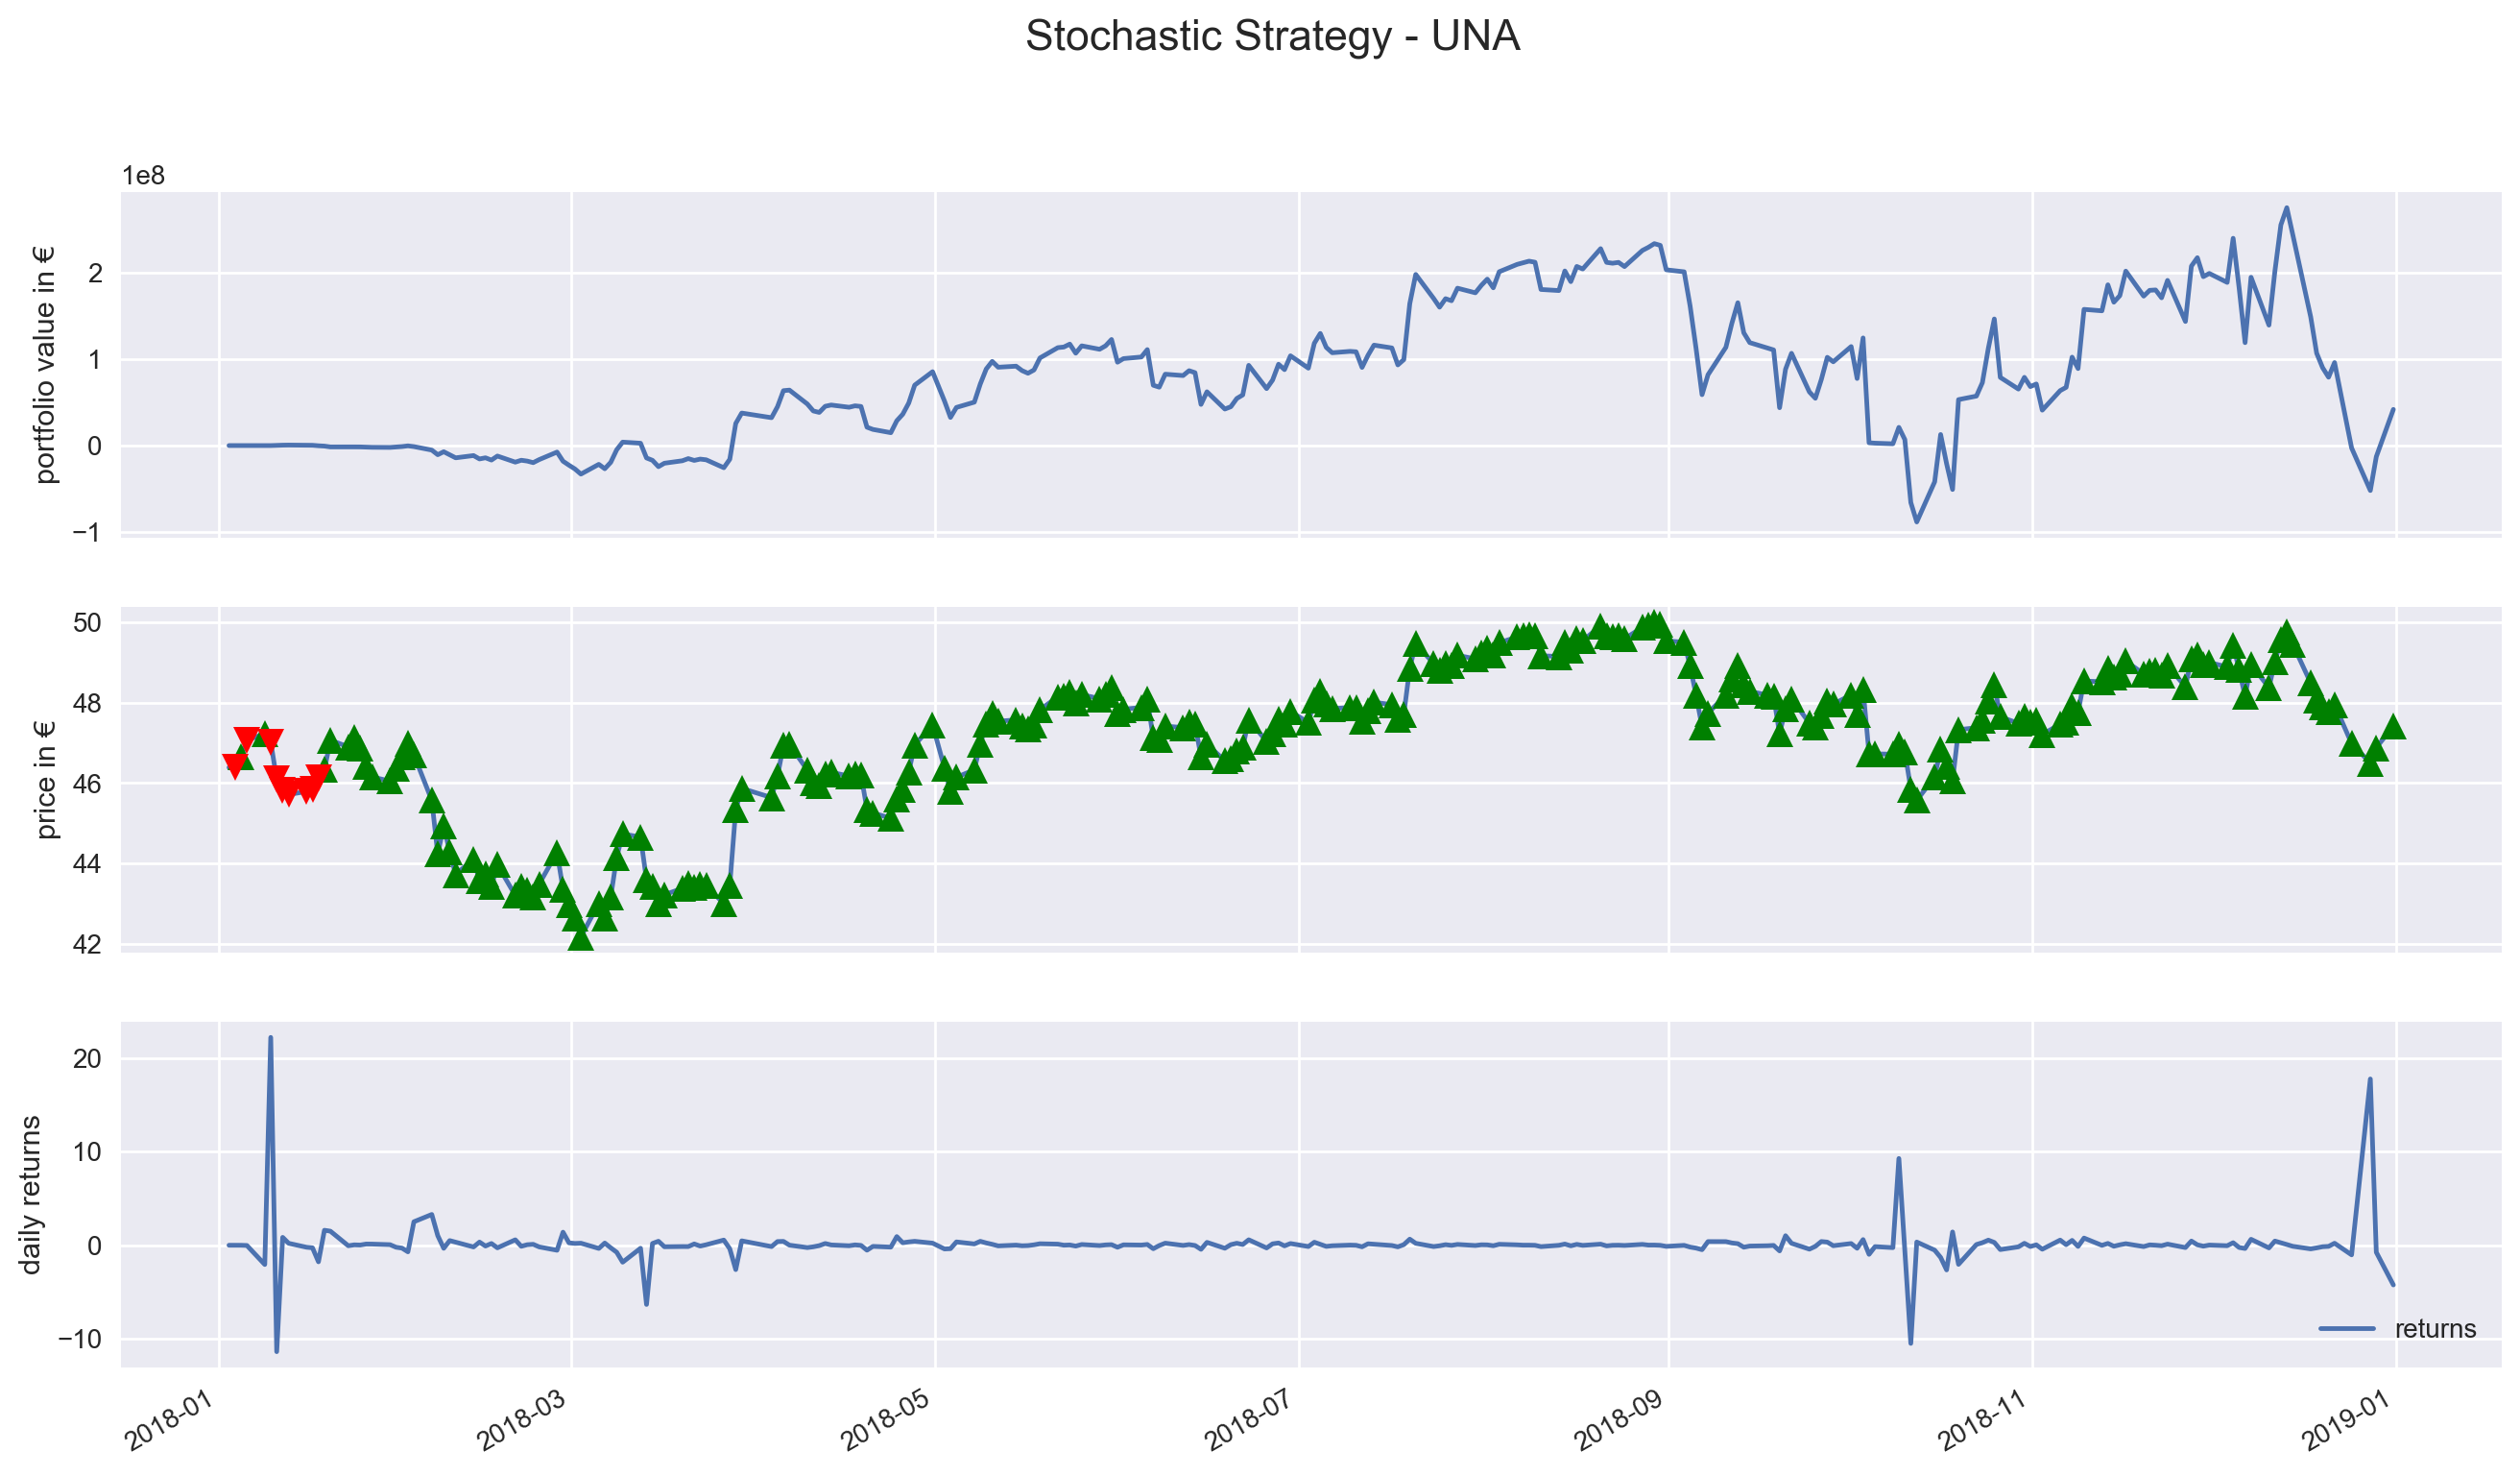

Final portfolio value (including cash): 41883419.94€


In [15]:
import qf_helper_functions as qf
qf.visualize_results(stochastic_results, 'Stochastic Strategy - UNA', '€')

In [16]:
stochastic_perf = qf.get_performance_summary(stochastic_results.returns)
print(stochastic_perf)

annual_volatility        35.531503
annualized_returns    36953.316152
cumulative_returns    41882.419943
max_drawdown            -60.535955
sharpe_ratio              0.526520
sortino_ratio             1.023344
dtype: float64


In [17]:
perf_df = pd.DataFrame({'stochastic performance': stochastic_perf})
perf_df.transpose()

,annual_volatility,annualized_returns,cumulative_returns,max_drawdown,sharpe_ratio,sortino_ratio
stochastic performance,35.531503,36953.316152,41882.419943,-60.535955,0.52652,1.023344


# Pyfolio Analysis

In [18]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(stochastic_results)

In [19]:
returns.head()

2018-01-02 00:00:00+00:00    0.000000
2018-01-03 00:00:00+00:00   -0.000418
2018-01-04 00:00:00+00:00   -0.002482
2018-01-05 00:00:00+00:00   -0.024423
2018-01-08 00:00:00+00:00   -2.061862
Name: returns, dtype: float64

In [20]:
positions.head()

sid,Equity(2 [UNA]),cash
index,,
2018-01-03 00:00:00+00:00,-9.277800e+01,1.092360e+03
2018-01-04 00:00:00+00:00,3.078900e+03,-2.081799e+03
2018-01-05 00:00:00+00:00,-9.930504e+04,1.002778e+05
2018-01-08 00:00:00+00:00,3.189307e+06,-3.190340e+06
2018-01-09 00:00:00+00:00,-1.441434e+07,1.439033e+07


In [21]:
transactions.head()

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2018-01-03 16:30:00+00:00,-2,None,2018-01-03 16:30:00+00:00,d5e06f50bad849d8a33fa4c37996e1d9,46.365806,Equity(2 [UNA]),Equity(2 [UNA]),92.731611
2018-01-03 16:30:00+00:00,2,None,2018-01-03 16:30:00+00:00,1bdc6a6dc2544cebbdcdde00043b2ff9,46.412195,Equity(2 [UNA]),Equity(2 [UNA]),-92.824389
2018-01-03 16:30:00+00:00,-2,None,2018-01-03 16:30:00+00:00,526a3b87dfa44f21945f54275b750026,46.365806,Equity(2 [UNA]),Equity(2 [UNA]),92.731611
2018-01-03 16:30:00+00:00,2,None,2018-01-03 16:30:00+00:00,00df783edc0c46b7b650c5e48d6289a0,46.412195,Equity(2 [UNA]),Equity(2 [UNA]),-92.824389
2018-01-03 16:30:00+00:00,-2,None,2018-01-03 16:30:00+00:00,96810c633ded495496e42eb7e4b7db56,46.365806,Equity(2 [UNA]),Equity(2 [UNA]),92.731611


C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:1477: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()
C:\Anaconda\envs\env_zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\envs\env_zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\envs\env_zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Start date,2018-01-02
End date,2018-12-31
Total months,12
,Backtest
Annual return,3695331.6%
Cumulative returns,4188242.0%
Annual volatility,3553.2%
Sharpe ratio,0.53
Calmar ratio,610.44
Stability,NaN
Max drawdown,-6053.6%


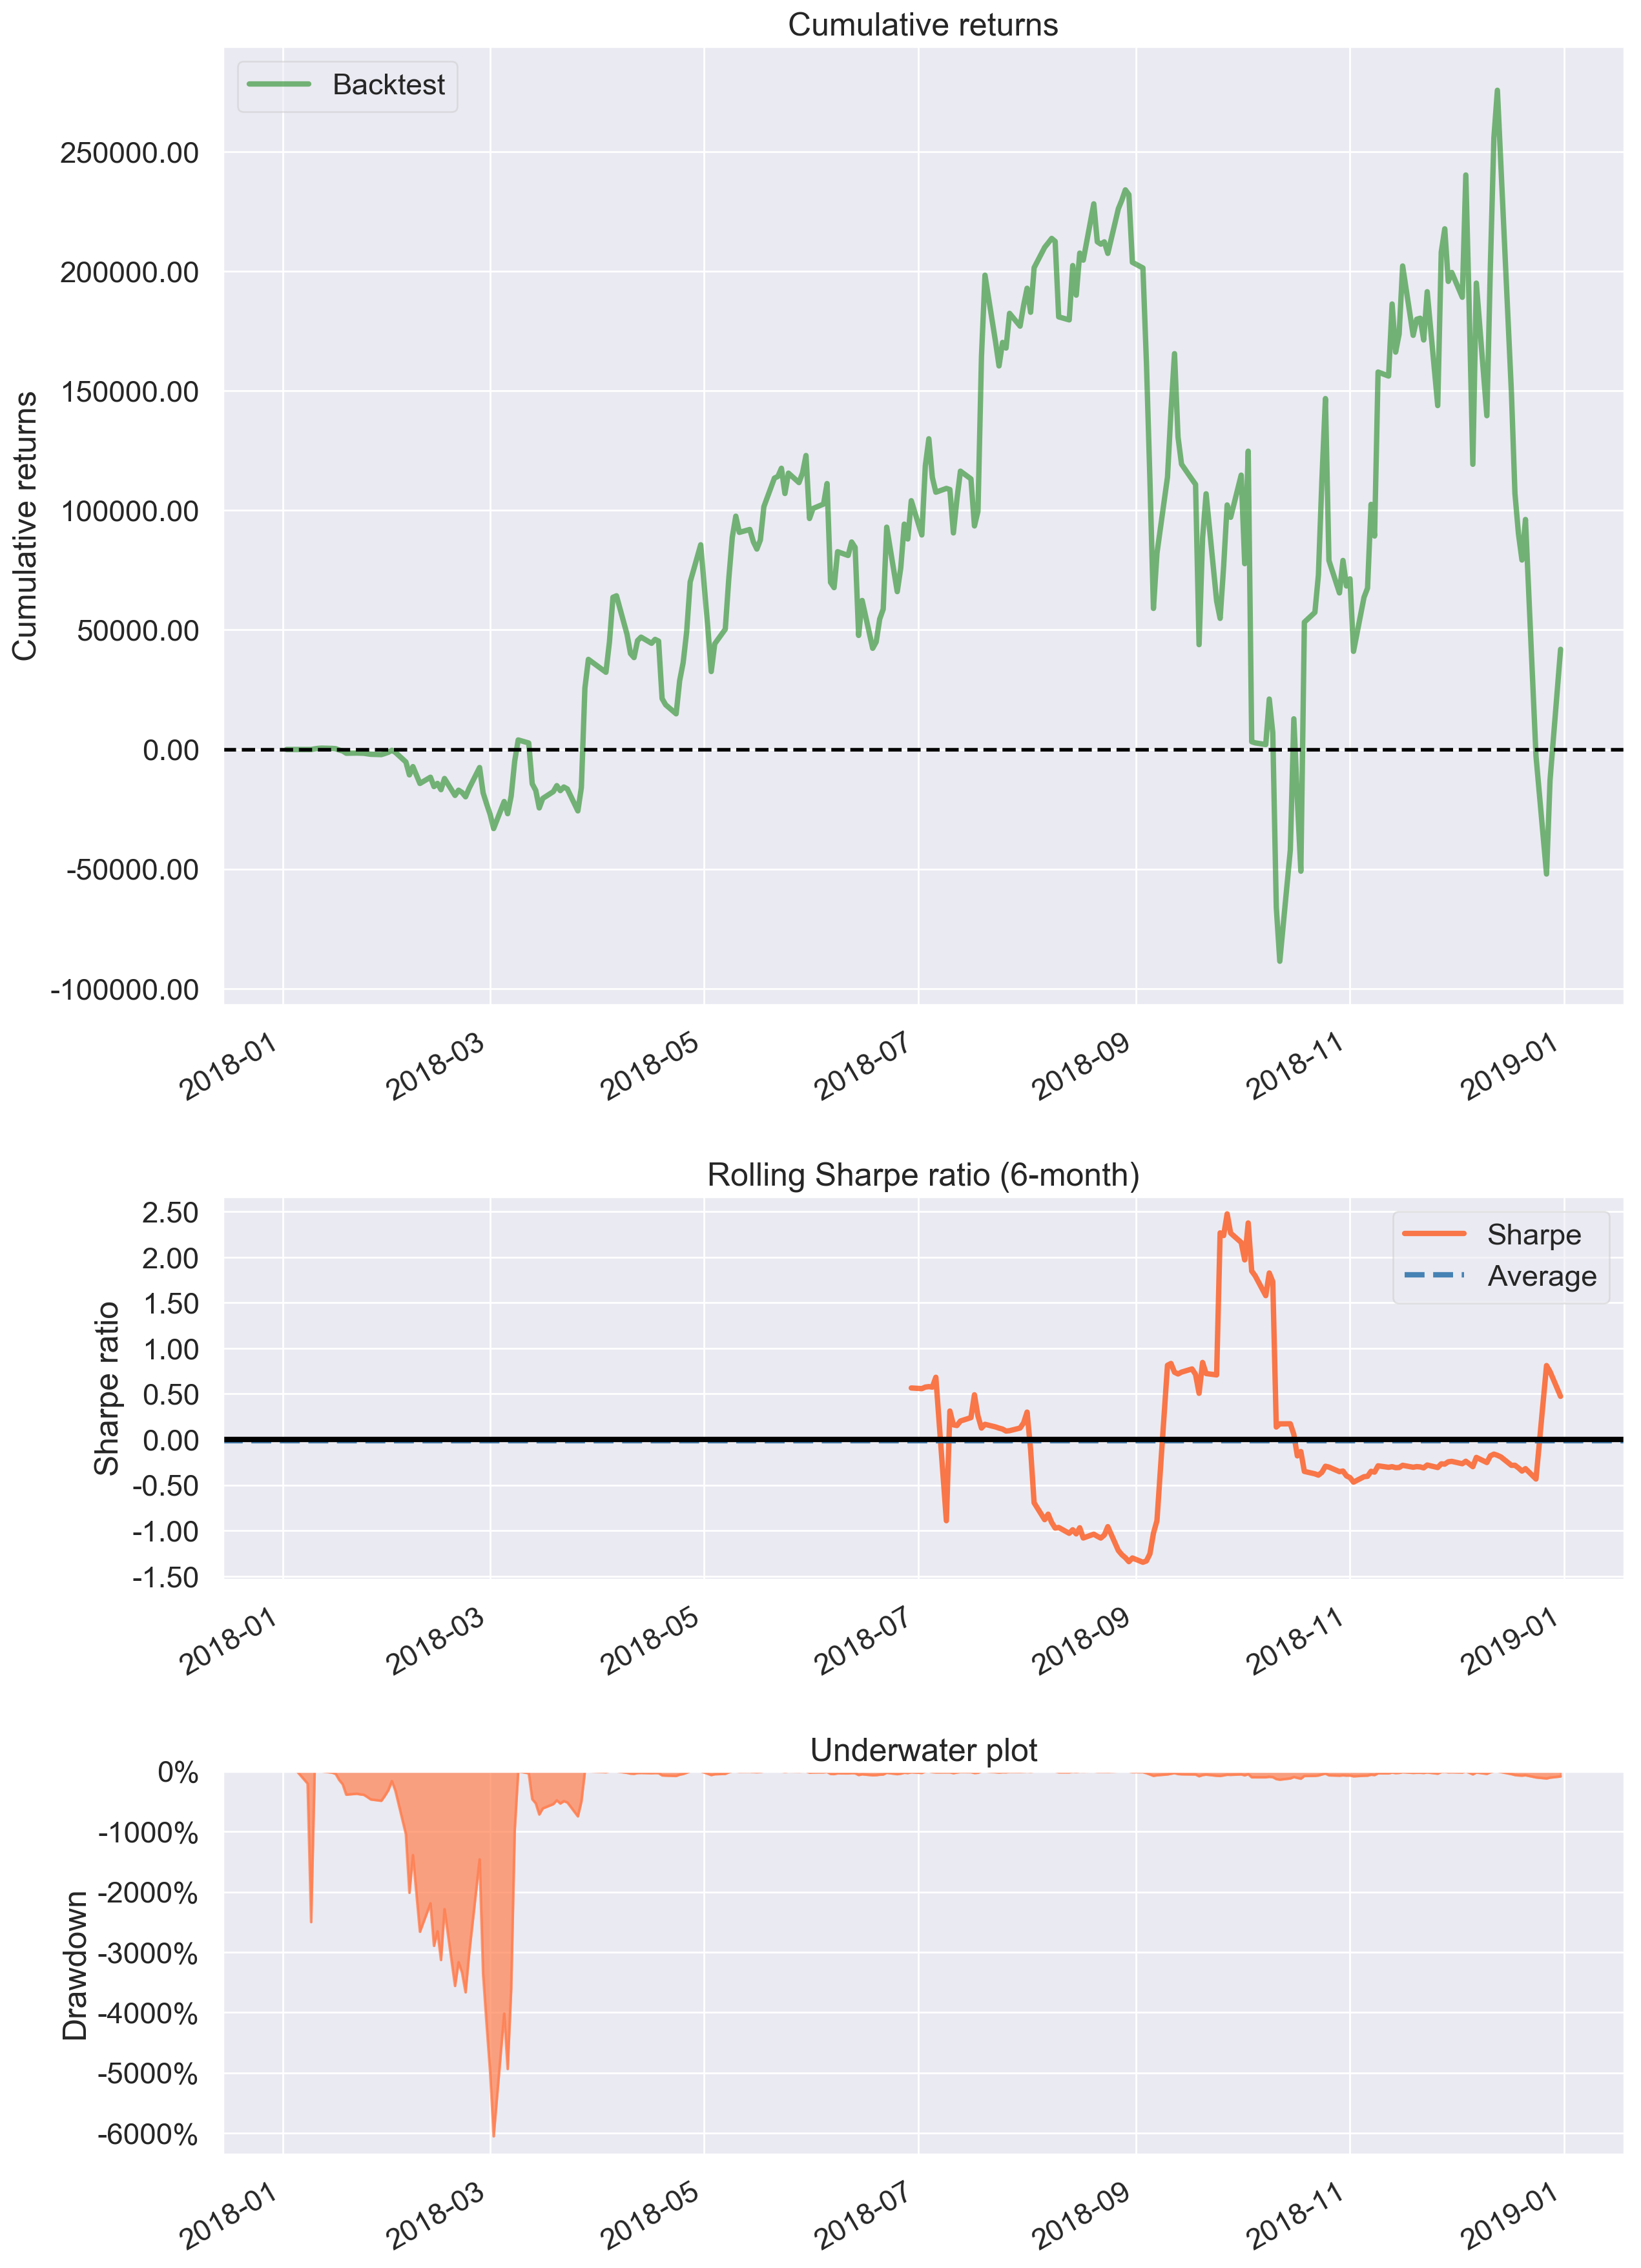

In [22]:
pf.create_simple_tear_sheet(returns)

C:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:1477: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()
C:\Anaconda\envs\env_zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\envs\env_zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\envs\env_zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Start date,2018-01-02
End date,2018-12-31
Total months,12
,Backtest
Annual return,3695331.6%
Cumulative returns,4188242.0%
Annual volatility,3553.2%
Sharpe ratio,0.53
Calmar ratio,610.44
Stability,NaN
Max drawdown,-6053.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,6053.60,2018-01-12,2018-03-02,2018-03-09,41
1,2500.69,2018-01-02,2018-01-09,2018-01-10,7
2,746.81,2018-03-09,2018-03-26,2018-03-28,14
3,137.85,2018-08-29,2018-10-12,2018-12-04,70
4,118.90,2018-12-13,2018-12-27,NaT,NaN


Stress Events,mean,min,max
New Normal,7.42%,-1139.16%,2224.16%


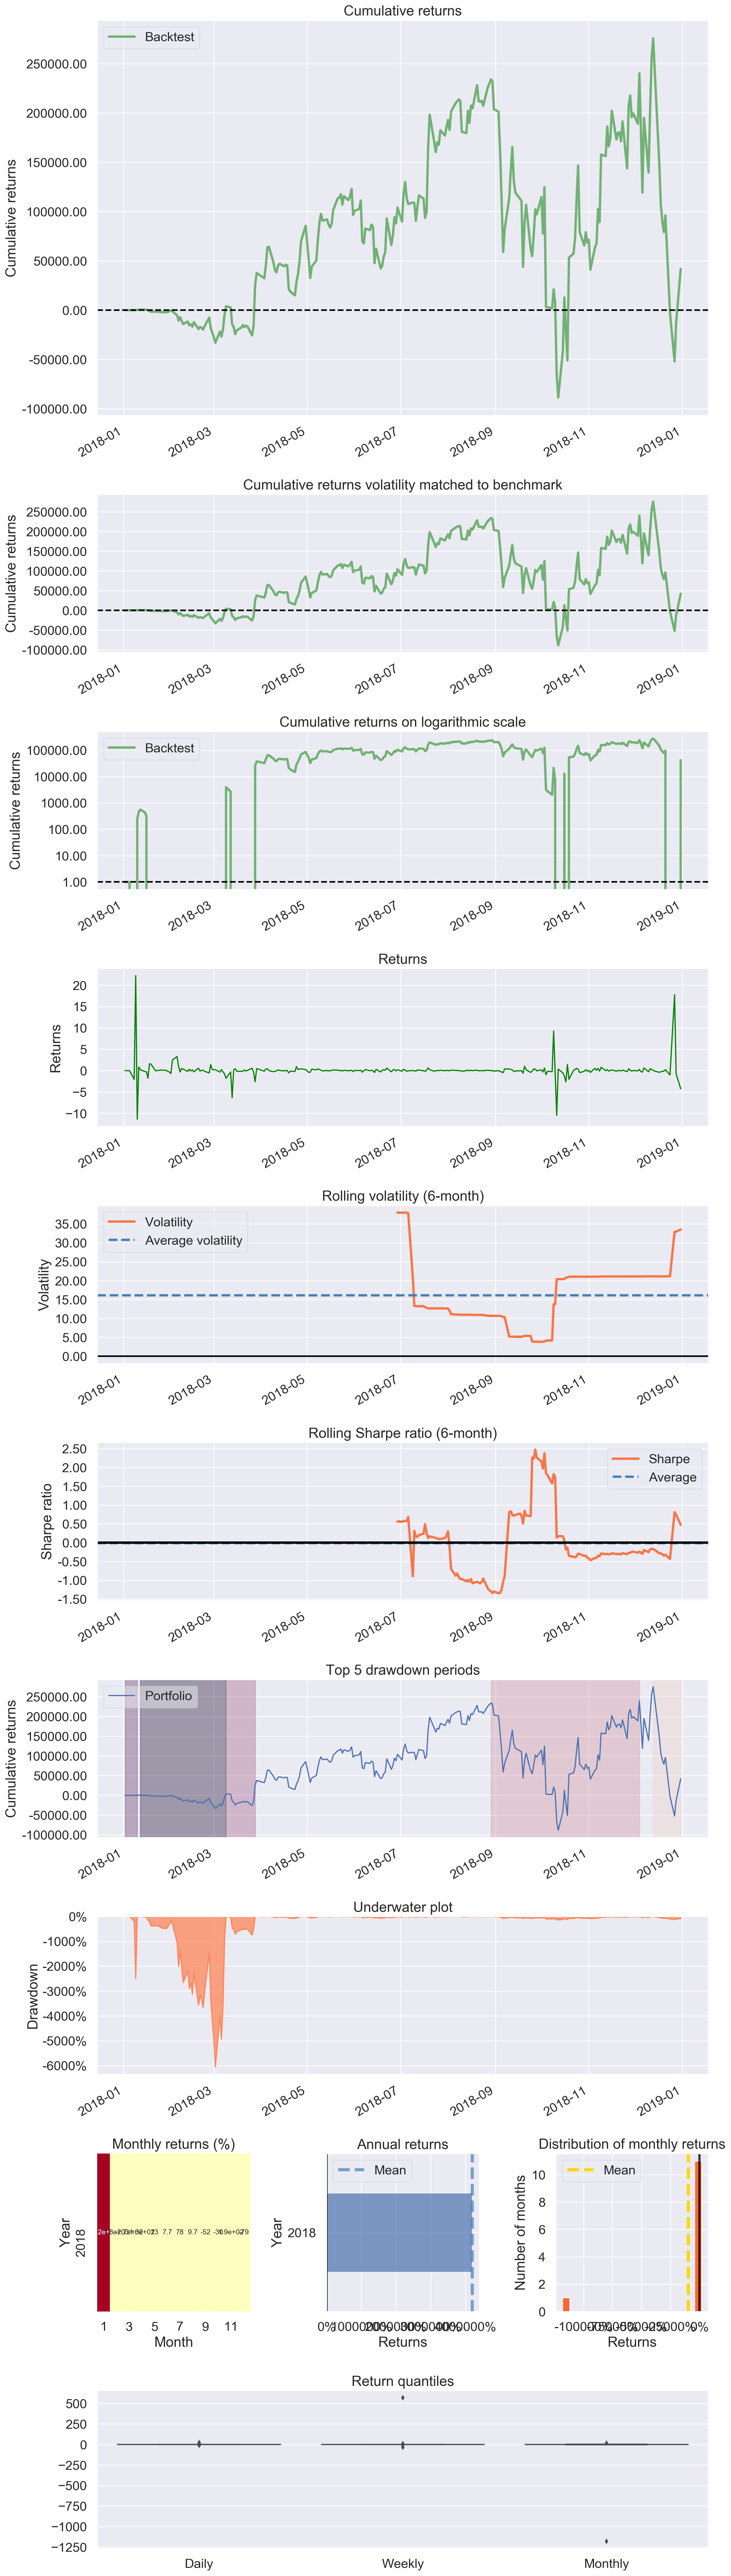

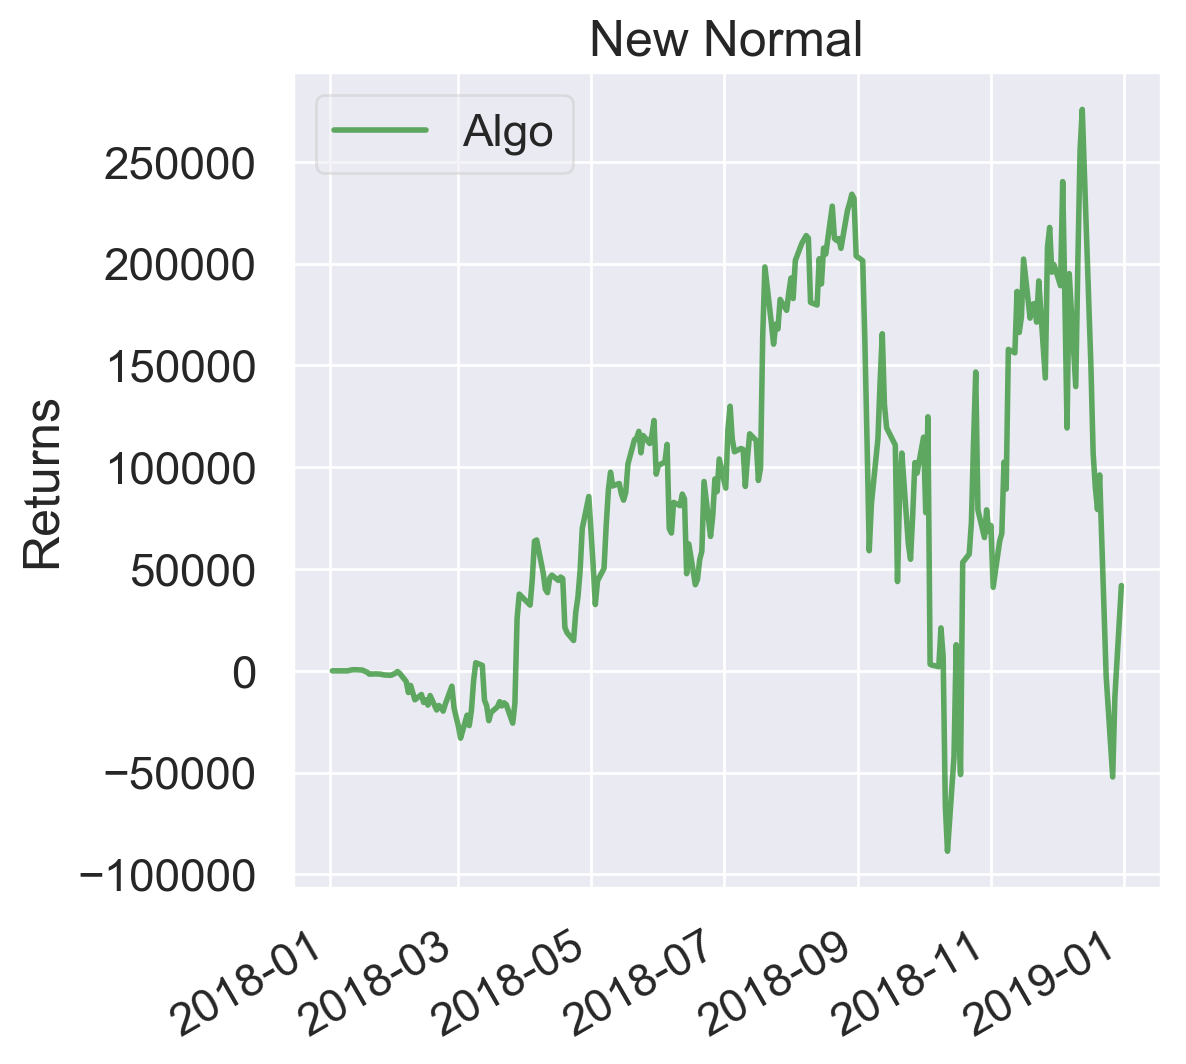

In [23]:
pf.create_full_tear_sheet(returns)